# Evaluate test data
This notebook showcases a simple approach to get predictions on test data and in order to do some useful evaluations.

### Housekeeping

In [1]:
import os

import pandas as pd

from cyc_pep_perm.data.paths import (
    DATA_PATH,
    MODEL_RF_RANDOM_DW,
    MODEL_RF_RANDOM_MORDRED,
    MODEL_XGB_RANDOM_DW,
    MODEL_XGB_RANDOM_MORDRED,
    TRAIN_RANDOM_MORDRED,
)

## Predict test permeability

We do everything with Random Forest and DataWarrior descriptors. Please change the inputs with the desired paths accordingly.

In [2]:
from cyc_pep_perm.models.randomforest import RF

# instantiate class
rf_regressor = RF()

# load trained model
model = rf_regressor.load(MODEL_RF_RANDOM_DW)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Please also preprocess the test data first too. The target column does not need to be provided (but can be).

### Predict only

In [7]:
test_path = os.path.join(DATA_PATH, "perm_random20_test_dw.csv")

df = pd.read_csv(test_path)
X = df.drop(["SMILES", "target"], axis=1)

# predict only
y_pred = rf_regressor.predict(X)

### Predict and evaluate (with labels)

In [8]:
test_path = os.path.join(DATA_PATH, "perm_random20_test_dw.csv")

y_pred, rmse, r2 = rf_regressor.test(test_path)
print(f"Training RMSE = {rmse:0.2f}")
print(f"Training R2 = {r2:0.2f}")

RMSE: 9.597
R-squared: 0.682
Training RMSE = 9.60
Training R2 = 0.68


## Plots

Text(0.05, 0.85, 'R2 = 0.68')

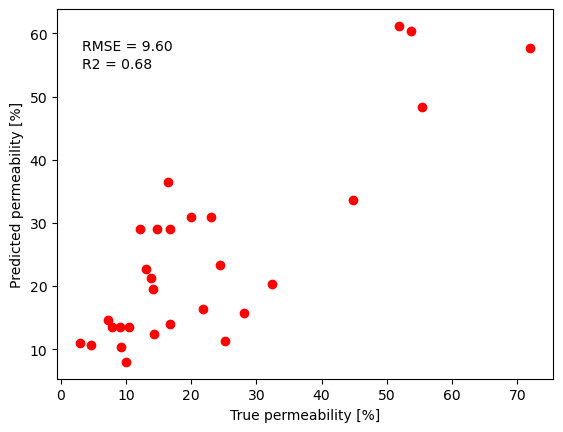

In [9]:
# plot predictions
import matplotlib.pyplot as plt

y_true = rf_regressor.y_test

plt.scatter(y_true, y_pred, color="r")
plt.xlabel("True permeability [%]")
plt.ylabel("Predicted permeability [%]")
# plot rme and r2
plt.text(0.05, 0.9, "RMSE = %0.2f" % rmse, ha="left", va="center", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, "R2 = %0.2f" % r2, ha="left", va="center", transform=plt.gca().transAxes)

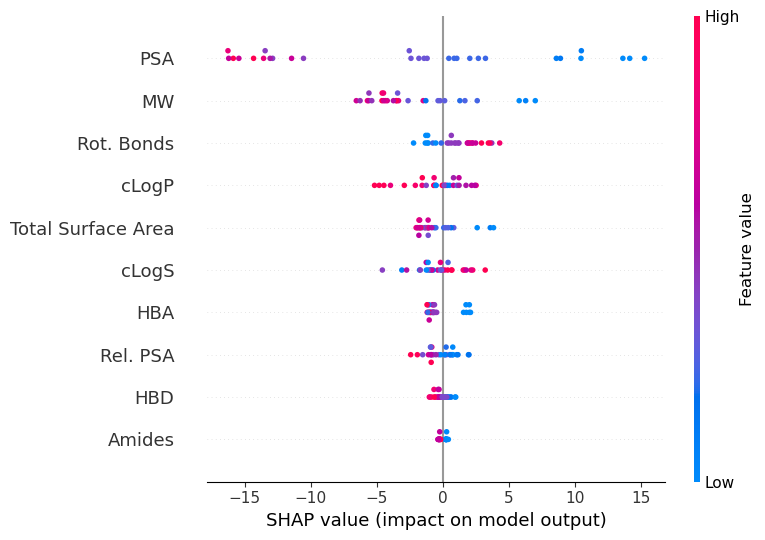

In [10]:
# this plot tells you the contribution of different features to the prediction
shap_values = rf_regressor.shap_explain(rf_regressor.X_test)